In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('data/iPS/log_normalised_counts.csv')
adata = adata.transpose()

In [3]:
cell_stages = pd.read_csv('data/iPS/cell_diff_stages.tsv', sep = '\t', index_col = 0)
cell_stages = cell_stages.sort_index()
cell_stages = cell_stages.set_index('cell')
cell_stages

,pseudo,day,cell_differentiation
cell,,,
21843_1#10,0.292682,day1,mesendo
21843_1#100,0.484716,day1,mesendo
21843_1#101,0.403809,day1,mesendo
21843_1#102,0.260772,day1,mesendo
21843_1#103,0.355366,day1,mesendo
...,...,...,...
24539_8#93,0.199677,day1,mesendo
24539_8#94,0.251769,day1,mesendo
24539_8#95,0.226935,day1,mesendo


In [4]:
cell_stages.cell_differentiation.unique()

array(['mesendo', 'no_stage', 'defendo', 'ips'], dtype=object)

In [5]:
cell_stages

,pseudo,day,cell_differentiation
cell,,,
21843_1#10,0.292682,day1,mesendo
21843_1#100,0.484716,day1,mesendo
21843_1#101,0.403809,day1,mesendo
21843_1#102,0.260772,day1,mesendo
21843_1#103,0.355366,day1,mesendo
...,...,...,...
24539_8#93,0.199677,day1,mesendo
24539_8#94,0.251769,day1,mesendo
24539_8#95,0.226935,day1,mesendo


In [6]:
adata.obs['cell_differentiation'] = cell_stages['cell_differentiation']
adata.obs['pseudotime'] = cell_stages['pseudo']
adata.obs['day'] = cell_stages['day']

In [7]:
sc.tl.pca(adata, svd_solver='arpack')

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


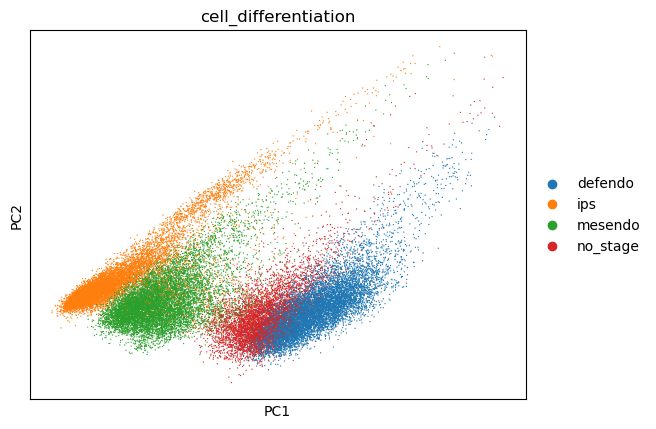

In [8]:
sc.pl.pca(adata, color = 'cell_differentiation')

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [10]:
sc.tl.umap(adata)

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


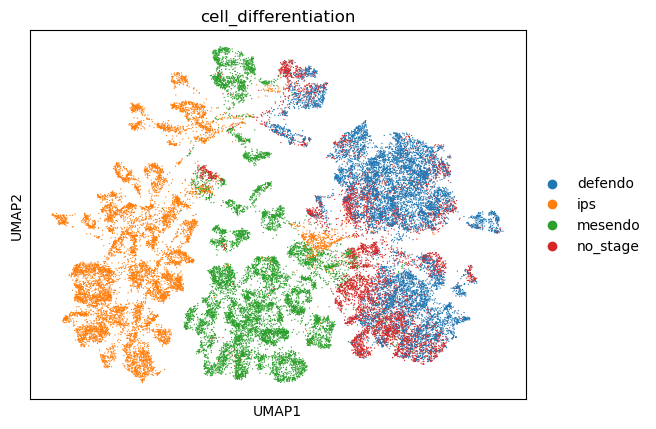

In [11]:
sc.pl.umap(adata, color='cell_differentiation')

In [12]:
adata.obs['cell_differentiation']

21843_1#10     mesendo
21843_1#100    mesendo
21843_1#101    mesendo
21843_1#102    mesendo
21843_1#103    mesendo
                ...   
24539_8#93     mesendo
24539_8#94     mesendo
24539_8#95     mesendo
24539_8#97     mesendo
24539_8#98     mesendo
Name: cell_differentiation, Length: 36044, dtype: category
Categories (4, object): ['defendo', 'ips', 'mesendo', 'no_stage']

In [13]:
adata

AnnData object with n_obs × n_vars = 36044 × 11231
    obs: 'cell_differentiation', 'pseudotime', 'day'
    uns: 'pca', 'cell_differentiation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [14]:
ips = adata[adata.obs['cell_differentiation'] == 'ips',:]

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [15]:
ips

View of AnnData object with n_obs × n_vars = 10153 × 11231
    obs: 'cell_differentiation', 'pseudotime', 'day'
    uns: 'pca', 'cell_differentiation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
import nimfa
factors = 10
nmf = nimfa.Nmf(ips.X, seed="nndsvd", rank=factors, max_iter=20, update = 'divergence',
                objective='div')
nmf_fit = nmf()

In [17]:
import pickle


In [18]:
with open('results/nmf_ips.pickle', 'wb') as f:
    pickle.dump(nmf_fit, f)

In [20]:
defendo = adata[adata.obs['cell_differentiation'] == 'defendo', :]
nmf_d = nimfa.Nmf(defendo.X,seed="nndsvd", rank=factors, max_iter=20, update = 'divergence',
                objective='div')
nmf_d_fit = nmf_d()

mesendo = adata[adata.obs['cell_differentiation'] == 'mesendo', :]
nmf_m = nimfa.Nmf(mesendo.X,seed="nndsvd", rank=factors, max_iter=20, update = 'divergence',
                objective='div')
nmf_m_fit = nmf_m()

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [21]:
with open('results/nmf_defendo.pickle', 'wb') as f:
    pickle.dump(nmf_d_fit, f)

with open('results/nmf_mesendo.pickle', 'wb') as f:
    pickle.dump(nmf_m_fit, f)



In [16]:
nmf_fit.fit.evar()

0.8794411419463946

In [14]:
consensus = nmf_fit.fit.consensus()

In [15]:
np.save('results/nmf_ips_consensus', consensus)

In [16]:
consensus.shape

(11231, 11231)

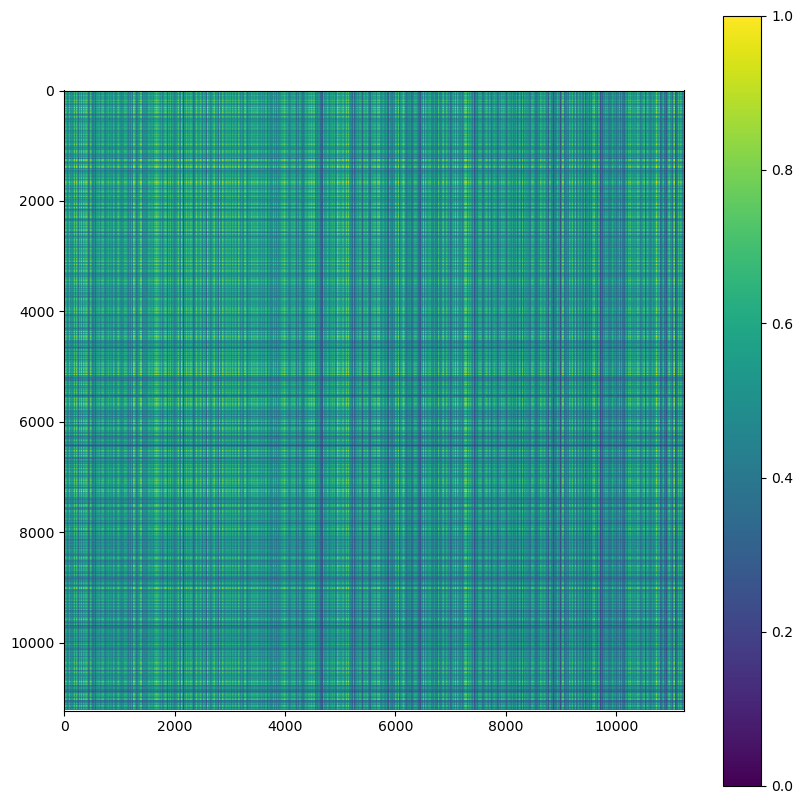

In [17]:
plt.figure(figsize=(10, 10))  # Set the figure size to an appropriate value
plt.imshow(consensus, cmap='viridis')  # Use a colormap of your choice (e.g., 'viridis')
plt.colorbar()  # Add a colorbar to the heatmap

In [ ]:
sns.heatmap(consensus.T)
plt.xlabel("Factor")
plt.ylabel("Gene")

KeyboardInterrupt: 

Text(50.722222222222214, 0.5, 'Gene')

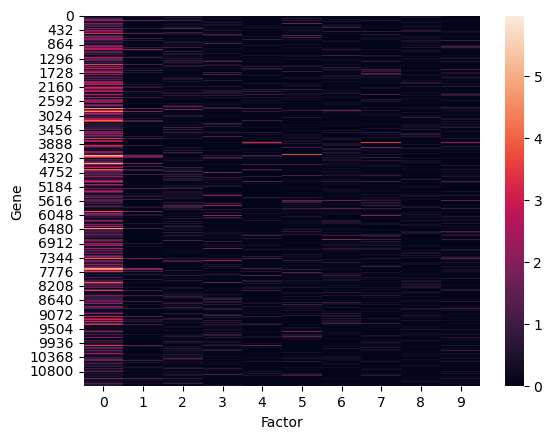

In [11]:
sns.heatmap(nmf_fit.coef().T)
plt.xlabel("Factor")
plt.ylabel("Gene")

In [30]:
defendo = adata[adata.obs['cell_differentiation'] == 'defendo',:]

/home/psnguyen/.conda/envs/single-cell/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [31]:
defendo

View of AnnData object with n_obs × n_vars = 9906 × 11231
    obs: 'cell_differentiation', 'pseudotime', 'day'
    uns: 'pca', 'cell_differentiation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'